## First Task: Cosine Distance Among Political Parties

Import necessary tools.

In [1]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import matplotlib.cm as cmap


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

Read 300.000 rows of the given file.

In [2]:
%%time
data = pd.read_csv('../out_files/tell_all_corrected.csv', nrows=200000)

CPU times: user 4.79 s, sys: 419 ms, total: 5.21 s
Wall time: 8.47 s


Get only the columns we need, that is "speech" and "political_party".

In [3]:
data = data[['speech', 'political_party']]
data.head(3)

speech  \
0   Παρακαλείται ο Γραμματέας κ. Βουλγαράκης να σ...   
1   Παρακαλείται ο κύριος Γραμματέας να συνοδεύσε...   
2   Κύριοι συνάδελφοι, παρακαλώ τη Βουλή να εξουσ...   

                  political_party  
0  πανελληνιο σοσιαλιστικο κινημα  
1  πανελληνιο σοσιαλιστικο κινημα  
2  πανελληνιο σοσιαλιστικο κινημα

Group speeches by political party.

In [4]:
grouped_data = data.groupby(['political_party'])['speech'].apply(''.join).reset_index()
grouped_data.head(3)

political_party  \
0  ανεξαρτητοι (εκτος κομματος)   
1                 αντιπολιτευση   
2                         βουλη   

                                              speech  
0   Κύριε Πρόεδρε, κυρίες και κύριοι συνάδελφοι, ...  
1  Δεν σας ακούμε. Κατά πλειοψηφία. Κατά πλειοψηφ...  
2   Μάλιστα, μάλιστα. Μάλιστα, μάλιστα. Μάλιστα, ...

Transform speeches with TfidfVectorizer and compute cosine similarity.

X is the tf-idf matrix of the documents. Its shape is (number of documents/speeches, number of unique tokens).
For each document, the first tuple represents: (document_id, token_id) and the value following the tuple represents the tf-idf score of a given token in a given document. The tuples that are not there have a tf-idf score of 0.

In the TfidfVectorizer() you can try out different min_df, max_df parameters (either number of frequency) and see how the X.shape and similarities change

In [5]:
grouped_data_no_accents = grouped_data.copy()
grouped_data_no_accents['speech'] = grouped_data.speech.str.translate(
                 str.maketrans('άέόώήίϊΐύϋΰ', 'αεοωηιιιυυυ')
               )

In [6]:
%%time
vec = TfidfVectorizer(min_df=0.1, max_df=0.9)
X = vec.fit_transform(grouped_data_no_accents['speech'])
similarities = cosine_similarity(X)

CPU times: user 21.1 s, sys: 646 ms, total: 21.7 s
Wall time: 21.7 s


In [7]:
X.shape

(12, 107831)

With the function below you can see the words/tokens used for the tfidf matrix. This will help in the next steps with the possible preprocessing of the speeches for the best computation of cosine similarity.

In [8]:
vec.get_feature_names()

['00',
 '000',
 '0000',
 '0001',
 '0002',
 '0004',
 '0005',
 '0006α',
 '0007',
 '0009',
 '000σελιδα',
 '000τα',
 '001',
 '0010',
 '0011',
 '0012',
 '0013',
 '0014',
 '0015',
 '0016',
 '0017',
 '002',
 '0020',
 '0022',
 '0023',
 '0024',
 '0025',
 '0026',
 '0027',
 '0028',
 '0029',
 '003',
 '0030',
 '0031',
 '0032',
 '0033',
 '0034',
 '0035',
 '0036',
 '0037',
 '0038',
 '0039',
 '0041',
 '0042',
 '0044',
 '0045',
 '0046',
 '0047',
 '0048',
 '0049',
 '0050',
 '0051',
 '0052',
 '0053',
 '0054',
 '006',
 '0060',
 '0062',
 '0063',
 '0065',
 '007',
 '0070',
 '0071',
 '0072',
 '0073',
 '0075',
 '0076',
 '0077',
 '0078',
 '0079',
 '008',
 '0080',
 '0081',
 '0082',
 '0083',
 '0084',
 '0085',
 '0086',
 '0087',
 '0088',
 '0089',
 '009',
 '0090',
 '0091',
 '0092',
 '0093',
 '0094',
 '0095',
 '0096',
 '0097',
 '0098',
 '0099',
 '00μ',
 '00μμ',
 '00πμ',
 '01',
 '010',
 '0100',
 '0101',
 '0102',
 '0106',
 '0108',
 '011',
 '0110',
 '0111',
 '0112',
 '0113',
 '0115',
 '0118',
 '012',
 '0122',
 '0123',
 

In [9]:
print(len(similarities))
print(similarities.shape)

12
(12, 12)


Visualize the results with a heatmap. The matrix shown is symmetric.

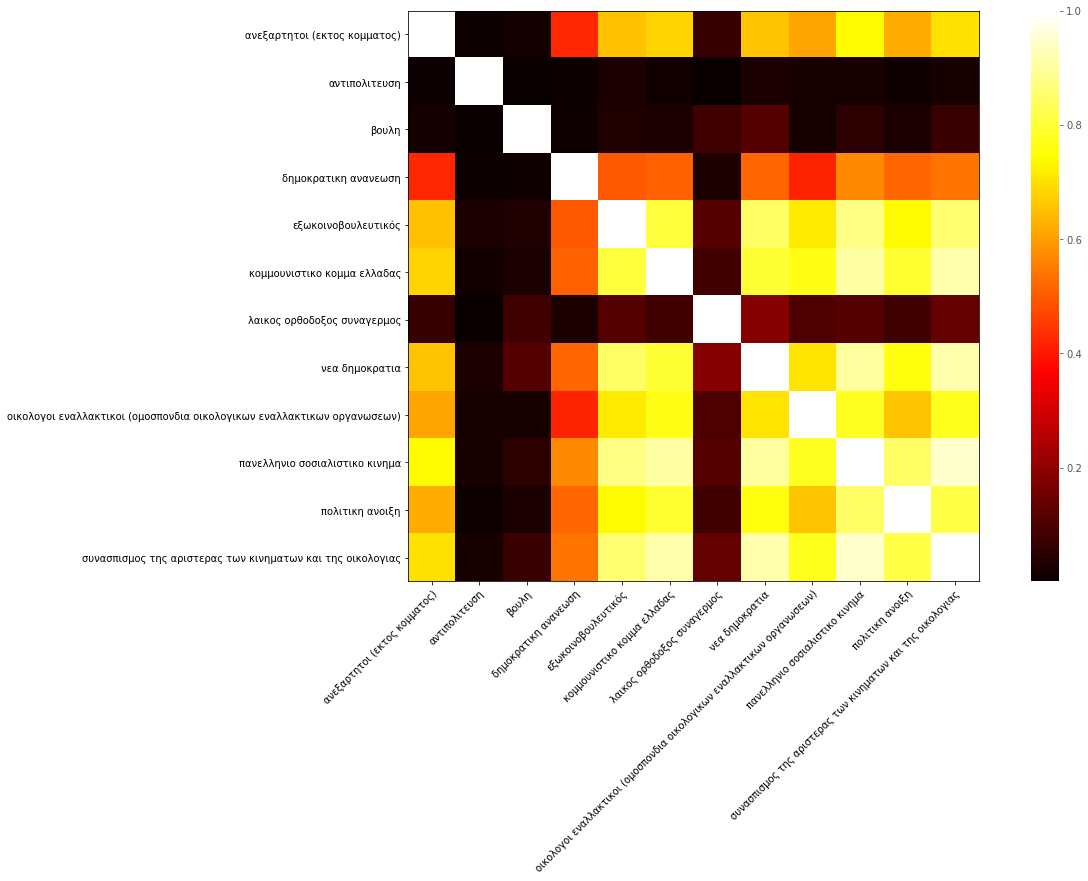

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
plt.style.use('ggplot')
plt.imshow(similarities, cmap=cmap.hot)
plt.colorbar()

# We want to show all ticks...
ax.set_xticks(np.arange(len(similarities)))
ax.set_yticks(np.arange(len(similarities)))
# ... and label them with the respective list entries
ax.set_xticklabels(grouped_data_no_accents.political_party)
ax.set_yticklabels(grouped_data_no_accents.political_party)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.savefig('../out_files/fig1.png', dpi=100, bbox_inches='tight')
plt.show()

In [11]:
average1 = sum(sum(similarities)) / (12 * 12)
average1

0.46303948630647795

- We can conclude that there are some parties and the parliament that possibly have great differences in their speeches compared to the other parties' speeches. These parties are "Αντιπολίτευση", "Λαϊκός Ορθόδοξος Συναργεμός" and "Δημοκρατική Ανανέωση".
- All the other parties seem to have more similar speeches.

In [12]:
%%time
vec = TfidfVectorizer()
X = vec.fit_transform(grouped_data_no_accents['speech'])
similarities = cosine_similarity(X)

CPU times: user 22.5 s, sys: 363 ms, total: 22.8 s
Wall time: 22.8 s


Without any given parameters to TfidfVectorizer the scores are closer to 1, that is the different parties seem to have more similar speeches.

In [13]:
vec.get_feature_names()

['00',
 '000',
 '0000',
 '0001',
 '000102',
 '00011',
 '000112',
 '00012',
 '000123',
 '00013',
 '000133',
 '000144',
 '000145',
 '00015',
 '000155',
 '00016',
 '000167',
 '00017',
 '000178',
 '000189',
 '00019',
 '0001911',
 '0002',
 '00020',
 '0002013',
 '00021',
 '0002116',
 '00022',
 '00023',
 '00024',
 '00025',
 '000255',
 '00027',
 '000297',
 '0002γραφημα',
 '0002θεωρουμε',
 '0003',
 '000319',
 '0003επιλεξει',
 '0004',
 '0004γων',
 '0005',
 '0006',
 '000603',
 '000635',
 '0006α',
 '0006που',
 '0007',
 '000716',
 '0008',
 '00081',
 '000858',
 '0008μοκρατια',
 '0009',
 '00091',
 '000927',
 '0009α',
 '0009ορισμενες',
 '000mw',
 '000έτος',
 '000αυτα',
 '000διδακτικο',
 '000δραχμες',
 '000δραχμων',
 '000δρχ',
 '000επι',
 '000και',
 '000καταστηματαρχες',
 '000νται',
 '000προηγουμενηςμετ',
 '000πως',
 '000σελιδα',
 '000τα',
 '000υπερβαλλον',
 '001',
 '0010',
 '0010λογη',
 '0010μερη',
 '0010νομους',
 '0011',
 '0011δυο',
 '0012',
 '0012αναφερθω',
 '0012βητηση',
 '0013',
 '0013απο',
 '0014

In [14]:
X.shape

(12, 234990)

The tokenised words are more, as expected, because without parameters/limits more words are taken into consideration and have associated scores.

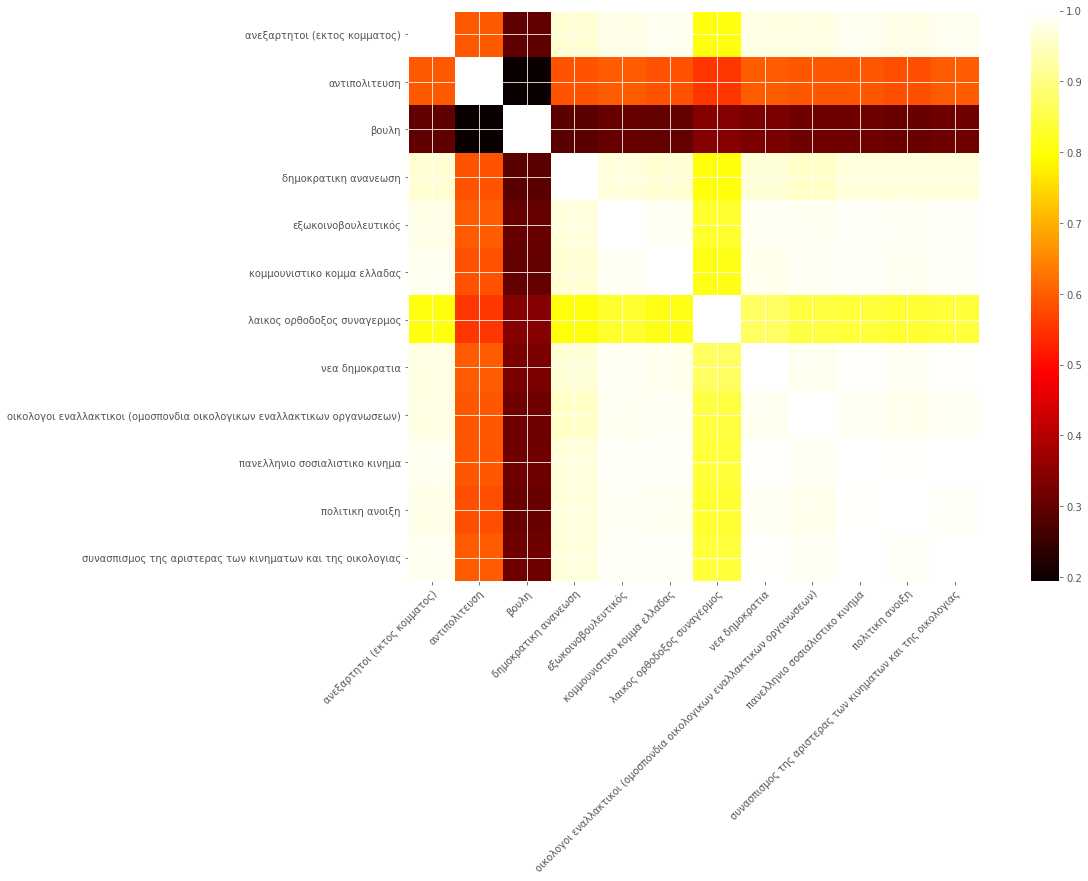

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
plt.style.use('ggplot')
plt.imshow(similarities, cmap=cmap.hot)
plt.colorbar()

# We want to show all ticks...
ax.set_xticks(np.arange(len(similarities)))
ax.set_yticks(np.arange(len(similarities)))
# ... and label them with the respective list entries
ax.set_xticklabels(grouped_data_no_accents.political_party)
ax.set_yticklabels(grouped_data_no_accents.political_party)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.savefig('../out_files/fig2.png', bbox_inches='tight')
plt.show()

In [16]:
average2 = sum(sum(similarities)) / (12 * 12)
average2

0.8065932147902632

In [17]:
%%time
vec = TfidfVectorizer(min_df=0.25, max_df=0.75)
X = vec.fit_transform(grouped_data_no_accents['speech'])
similarities = cosine_similarity(X)

CPU times: user 22.6 s, sys: 383 ms, total: 23 s
Wall time: 23 s


In [18]:
vec.get_feature_names()

['00',
 '0000',
 '0007',
 '001',
 '0010',
 '0014',
 '0015',
 '0016',
 '0022',
 '0024',
 '0029',
 '0030',
 '0031',
 '0032',
 '0035',
 '0038',
 '0041',
 '0046',
 '0050',
 '0052',
 '0053',
 '0073',
 '0078',
 '0079',
 '008',
 '0083',
 '0086',
 '0090',
 '0091',
 '0096',
 '00μμ',
 '01',
 '010',
 '0100',
 '011',
 '0111',
 '0115',
 '0124',
 '0126',
 '0127',
 '013',
 '014',
 '0147',
 '0149',
 '015',
 '0151',
 '0153',
 '0158',
 '0175',
 '0176',
 '0177',
 '0178',
 '019',
 '0191',
 '0197',
 '0199',
 '02',
 '020',
 '0206',
 '021',
 '0211',
 '0219',
 '022',
 '024',
 '0247',
 '025',
 '026',
 '0265',
 '0266',
 '027',
 '0273',
 '0276',
 '028',
 '0289',
 '029',
 '0290',
 '0293',
 '03',
 '030',
 '032',
 '0356',
 '04',
 '040',
 '0430',
 '0431',
 '0468',
 '047',
 '048',
 '05',
 '050',
 '051',
 '052',
 '054',
 '0549',
 '056',
 '0561',
 '0573',
 '06',
 '060',
 '062',
 '064',
 '0643',
 '065',
 '069',
 '0699',
 '07',
 '072',
 '0725',
 '076',
 '077',
 '0777',
 '0797',
 '0799',
 '08',
 '080',
 '081',
 '082',
 '0

In [19]:
X.shape

(12, 66803)

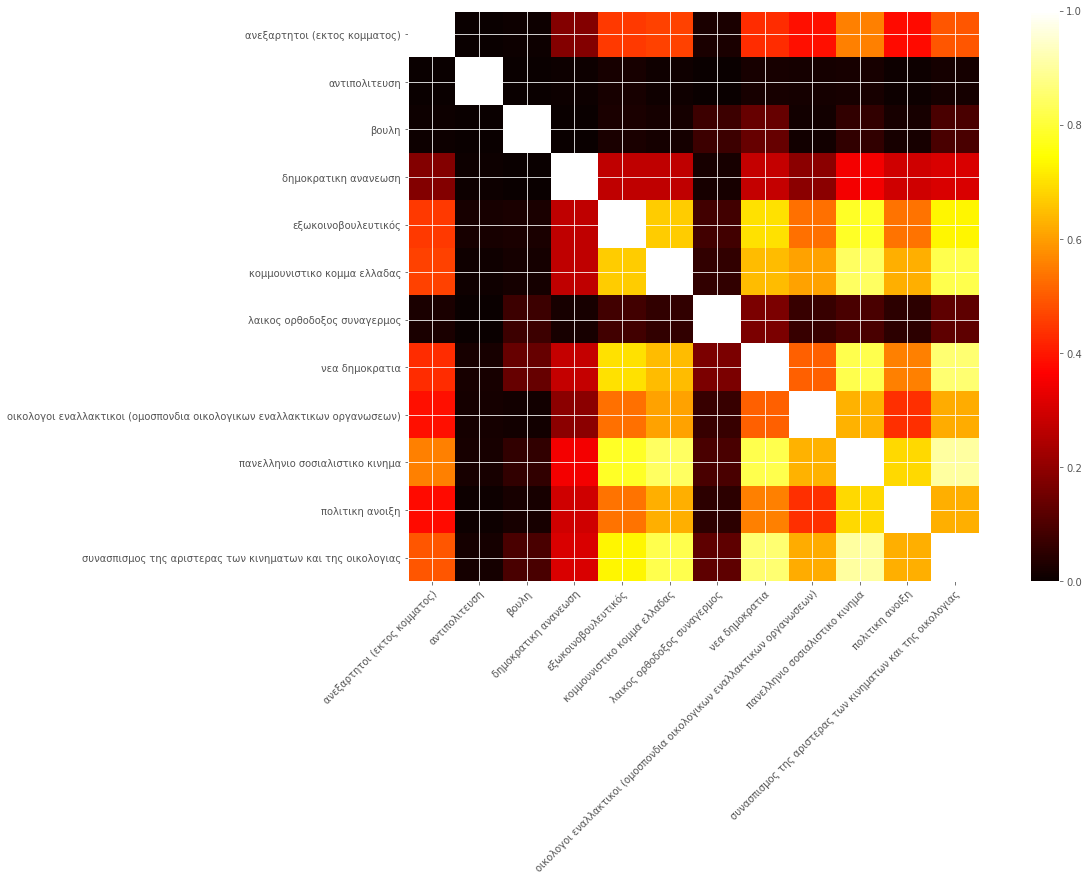

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
plt.style.use('ggplot')
plt.imshow(similarities, cmap=cmap.hot)
plt.colorbar()

# We want to show all ticks...
ax.set_xticks(np.arange(len(similarities)))
ax.set_yticks(np.arange(len(similarities)))
# ... and label them with the respective list entries
ax.set_xticklabels(grouped_data_no_accents.political_party)
ax.set_yticklabels(grouped_data_no_accents.political_party)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.savefig('../out_files/fig3.png', bbox_inches='tight')
plt.show()

In [21]:
average3 = sum(sum(similarities)) / (12 * 12)
average3

0.37165153947358376

Setting the limits higher seems to make the differences among parties larger. Now independent members and "Οικολόγοι Εναλλακτικοί" seem to have differences, too.

In [22]:
doubt = data.groupby(['political_party']).count()
doubt.sort_values(['speech'])

speech
political_party                                           
αντιπολιτευση                                            9
λαικος ορθοδοξος συναγερμος                             36
δημοκρατικη ανανεωση                                   102
οικολογοι εναλλακτικοι (ομοσπονδια οικολογικων ...     307
ανεξαρτητοι (εκτος κομματος)                           428
πολιτικη ανοιξη                                       1084
εξωκοινοβουλευτικός                                   3505
κομμουνιστικο κομμα ελλαδας                           5457
βουλη                                                 6543
συνασπισμος της αριστερας των κινηματων και της...   24522
πανελληνιο σοσιαλιστικο κινημα                       70785
νεα δημοκρατια                                       87222

- The conclusions we make by seeing the results above may be misleading. Parties' speeches with greater differences seem to depend on the fact that the speeches available are less. On the other hand, "Νέα Δημοκρατία", "Πανελλήνιο Σοσιαλιστικό Κίνημα" and "Συνασπισμος της Αριστερας των Κινηματων και της Οικολογιας" with the most speeches seem to be generally similar to other parties.
- However, "Βουλή", for example, has enough speeches and great differences, too.

## Cosine Distance with preprocessing

#### Digits removal

In [23]:
#select data with accents (we need accents for lemmatization)
data_preprocess = data.groupby(['political_party'])['speech'].apply(''.join).reset_index()

Now we remove all numbers from the dataframe and we'll see the results

In [24]:
from string import digits

# Note: removed mistaken command grouped_data['speech'] = data['speech'].replace(r'\b[0-9][0-9.,-]*\b', '', regex=True) 

# Remove numbers from speeches as well as within strings.
remove_digits = str.maketrans('', '', digits)
data_preprocess['speech'] = data_preprocess['speech'].apply(lambda x: x.translate(remove_digits))

In [25]:
%%time
vec = TfidfVectorizer()
X = vec.fit_transform(data_preprocess['speech'])
similarities = cosine_similarity(X)

CPU times: user 23.7 s, sys: 388 ms, total: 24.1 s
Wall time: 24.1 s


In [26]:
vec.get_feature_names()

['aa',
 'ab',
 'abairrahim',
 'abandonner',
 'abandonnγs',
 'abb',
 'abbas',
 'abc',
 'abdal',
 'abdel',
 'abee',
 'abela',
 'ability',
 'ablation',
 'able',
 'abn',
 'about',
 'aboutir',
 'aboutissant',
 'above',
 'abovementioned',
 'abreuvement',
 'abreuvoirs',
 'abri',
 'abridging',
 'abritant',
 'abriter',
 'absence',
 'absent',
 'absentia',
 'absoluitur',
 'absolute',
 'absorbantes',
 'absorption',
 'abstracta',
 'abstraction',
 'abstracto',
 'absurdum',
 'abuse',
 'abusus',
 'academie',
 'accede',
 'acceded',
 'accedes',
 'acceding',
 'accep',
 'accept',
 'accepta',
 'acceptable',
 'acceptance',
 'acceptances',
 'acceptant',
 'acceptation',
 'accepte',
 'accepted',
 'accepter',
 'acceptγ',
 'acceptγe',
 'acceptγes',
 'acceptγs',
 'acces',
 'access',
 'accessible',
 'accessibles',
 'accession',
 'accessions',
 'accessoires',
 'accessories',
 'acci',
 'accident',
 'accidents',
 'acciona',
 'acclimatation',
 'acclimatγs',
 'accommodated',
 'accommodation',
 'accommodationaccommodati

In [27]:
X.shape

(12, 220433)

Without any parameters in TfidfVectorizer, both feature names seem improved and tokens are critically reduced.

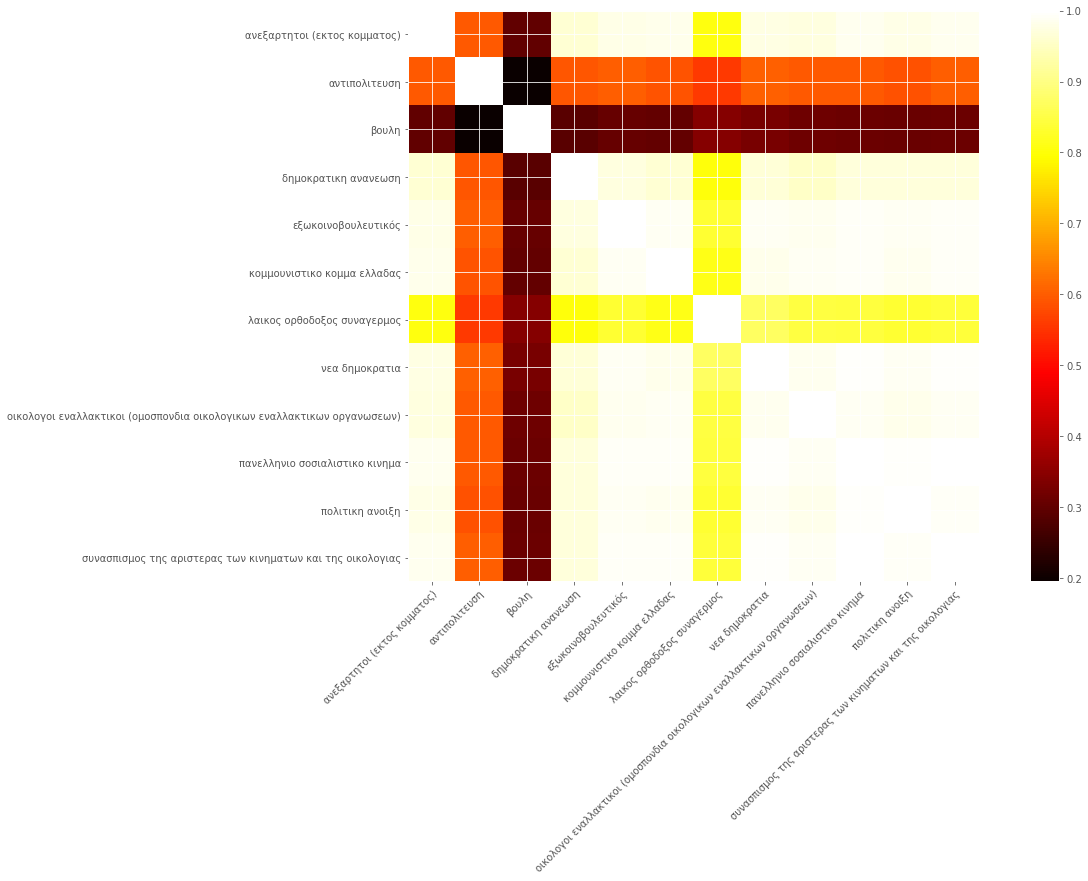

In [28]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
plt.style.use('ggplot')
plt.imshow(similarities, cmap=cmap.hot)
plt.colorbar()

# We want to show all ticks...
ax.set_xticks(np.arange(len(similarities)))
ax.set_yticks(np.arange(len(similarities)))
# ... and label them with the respective list entries
ax.set_xticklabels(data_preprocess.political_party)
ax.set_yticklabels(data_preprocess.political_party)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.savefig('../out_files/fig4.png', bbox_inches='tight')
plt.show()

In [29]:
average4 = sum(sum(similarities)) / (12 * 12)
average4

0.8073941704983674

All parties seem to be different concerning their speeches except "Πανελλήνιο Σοσιαλιστικό Κίνημα" - "Δημοκρατική Ανανέωση" and "Πολιτική Άνοιξη" - "Δημοκρατικό Κοινωνικό Κίνημα".

We try to add some parameters in TfidfVectorizer, too.

In [30]:
data_preprocess_no_accents = data_preprocess.copy()
data_preprocess_no_accents['speech'] = data_preprocess.speech.str.translate(
                 str.maketrans('άέόώήίϊΐύϋΰ', 'αεοωηιιιυυυ'))

In [31]:
%%time
vec = TfidfVectorizer(min_df=0.1, max_df=0.9) #moved accents stripping above because vectorizer was too slow
X = vec.fit_transform(data_preprocess_no_accents['speech'])
similarities = cosine_similarity(X)

CPU times: user 22.9 s, sys: 368 ms, total: 23.3 s
Wall time: 23.2 s


In [32]:
X.shape

(12, 103192)

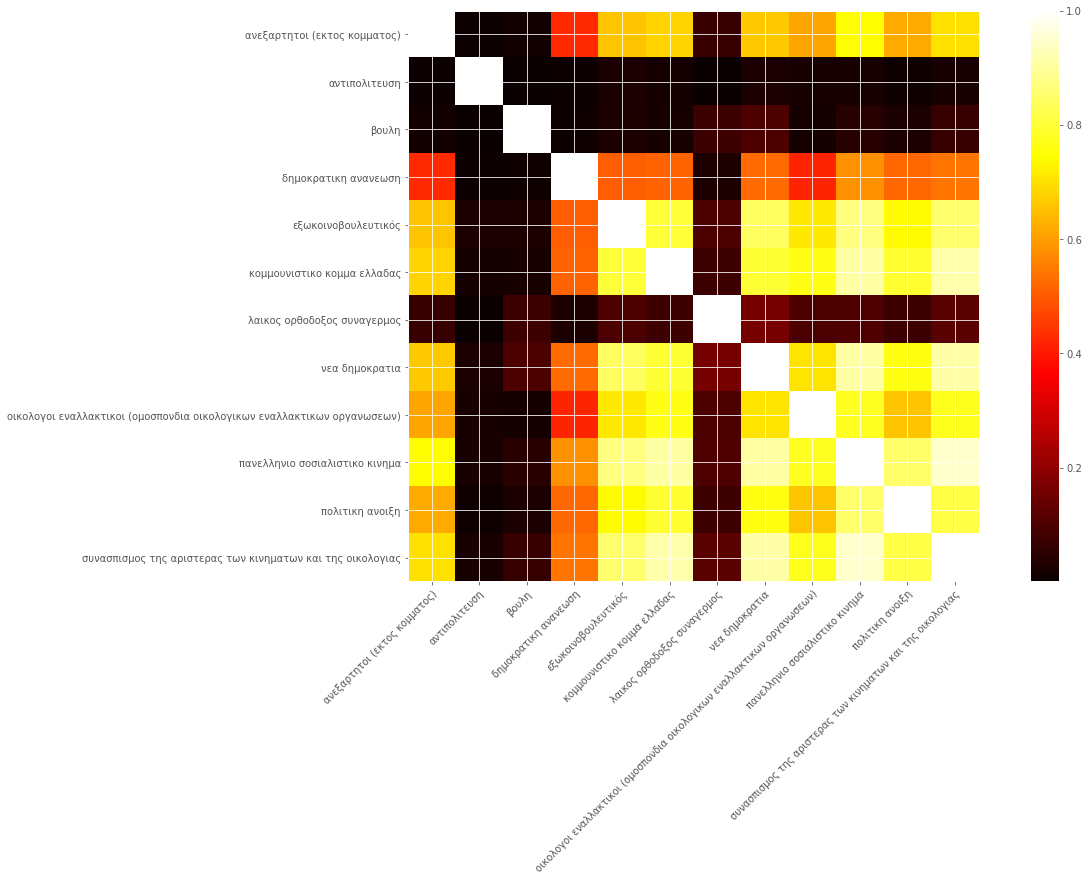

In [33]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
plt.style.use('ggplot')
plt.imshow(similarities, cmap=cmap.hot)
plt.colorbar()

# We want to show all ticks...
ax.set_xticks(np.arange(len(similarities)))
ax.set_yticks(np.arange(len(similarities)))
# ... and label them with the respective list entries
ax.set_xticklabels(data_preprocess.political_party)
ax.set_yticklabels(data_preprocess.political_party)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.savefig('../out_files/fig5.png', bbox_inches='tight')
plt.show()

In [34]:
average5 = sum(sum(similarities)) / (12 * 12)
average5

0.46217455815681496

 Edited: When less tokens are identified, the differences seem to be larger.

#### Stopwords removal (stemming)

In [35]:
# (dina) Simple and more common way to process the txt file of stopwords

with open ('../out_files/greek_stopwords_cschwem2er_with_accents.txt', 'r') as f:
    stopwords1 = f.read().upper().split(',')#.translate(str.maketrans('άέόώήίϊΐύϋΰ', 'αεοωηιιιυυυ'))
with open ('../out_files/greek_stopwords_spacy_accents.txt', 'r') as f:
    stopwords2 = f.read().upper().split(',')
stopwords = stopwords1 + stopwords2 # merge two files

In [36]:
import string

#removed punctuation here with this fast way because nltk tokenization was too sloww
upper_with_accents = data_preprocess.copy()
upper_with_accents['speech'] = upper_with_accents['speech'].str.upper()
upper_with_accents['speech'] = upper_with_accents['speech'].str.translate(str.maketrans('', '', string.punctuation))

In [37]:
# we uppercase the speeches before stemming
#grouped_data_stopwords_removed = data_preprocess.copy() (kaiti)
# (dina) moved accent removal further down. we should keep accents before stopword removal
# because we should not remove δίκη while the stopword is δική (without accents they are the same)
# grouped_data_stemmed['speech'] = grouped_data.speech.str.translate(
#                  str.maketrans('άέόώήίϊΐύϋΰ', 'αεοωηιιιυυυ')
#                )
upper_with_accents['speech']

0      ΚΎΡΙΕ ΠΡΌΕΔΡΕ ΚΥΡΊΕΣ ΚΑΙ ΚΎΡΙΟΙ ΣΥΝΆΔΕΛΦΟΙ ΘΕ...
1     ΔΕΝ ΣΑΣ ΑΚΟΎΜΕ ΚΑΤΆ ΠΛΕΙΟΨΗΦΊΑ ΚΑΤΆ ΠΛΕΙΟΨΗΦΊΑ...
2      ΜΆΛΙΣΤΑ ΜΆΛΙΣΤΑ ΜΆΛΙΣΤΑ ΜΆΛΙΣΤΑ ΜΆΛΙΣΤΑ ΜΆΛΙΣ...
3     ΑΥΤΌ ΤΟ ΟΠΟΊΟ ΕΊΝΑΙ ΣΗΜΑΝΤΙΚΌ ΑΞΙΌΤΙΜΕΣ ΚΥΡΊΕΣ...
4      ΚΥΡΊΕΣ ΚΑΙ ΚΎΡΙΟΙ ΒΟΥΛΕΥΤΈΣ ΣΤΗ ΣΥΖΉΤΗΣΗ ΓΙΑ ...
5      ΚΎΡΙΕ ΠΡΌΕΔΡΕ ΚΑΙ ΚΎΡΙΟΙ ΒΟΥΛΕΥΤΈΣ ΤΟ ΠΑΡΌΝ Ν...
6      Η ΒΟΥΛΉ ΕΓΚΡΊΝΕΙ ΚΎΡΙΟΙ ΣΥΝΆΔΕΛΦΟΙ ΕΙΣΕΡΧΌΜΑΣ...
7      ΚΥΡΊΕΣ ΚΑΙ ΚΎΡΙΟΙ ΣΥΝΆΔΕΛΦΟΙ ΑΝΑΛΑΜΒΆΝΟΝΤΑΣ Τ...
8      ΕΥΧΑΡΙΣΤΏ ΠΟΥ ΈΣΤΩ ΚΑΙ ΤΌΣΟ ΑΡΓΆ ΉΡΘΕ Η ΣΕΙΡΆ...
9      ΠΑΡΑΚΑΛΕΊΤΑΙ Ο ΓΡΑΜΜΑΤΈΑΣ Κ ΒΟΥΛΓΑΡΆΚΗΣ ΝΑ ΣΥ...
10     ΚΎΡΙΕ ΠΡΌΕΔΡΕ ΑΠΛΏΣ ΘΑ ΉΘΕΛΑ ΝΑ ΥΠΕΝΘΥΜΊΣΩ ΌΤ...
11     ΚΎΡΙΕ ΠΡΌΕΔΡΕ ΘΑ ΣΥΝΗΓΟΡΉΣΟΥΜΕ ΚΑΙ ΕΜΕΊΣ ΣΤΟ ...
Name: speech, dtype: object

In [38]:
# (dina) Έχει σχέση με το επόμενο cell
# Example to inspect difference between split() and nltk.word_tokenize
import nltk
from nltk.tokenize import word_tokenize

example = 'ΑΥΤΟ, ΣΗΜΑΝΤΙΚΟ, ΑΞΙΟΤΙΜΕΣ. ΚΥΡΙΕΣ ΑΞΙΟΤΙΜΟΙ '
print(example.split())
print(nltk.word_tokenize(example))

['ΑΥΤΟ,', 'ΣΗΜΑΝΤΙΚΟ,', 'ΑΞΙΟΤΙΜΕΣ.', 'ΚΥΡΙΕΣ', 'ΑΞΙΟΤΙΜΟΙ']
['ΑΥΤΟ', ',', 'ΣΗΜΑΝΤΙΚΟ', ',', 'ΑΞΙΟΤΙΜΕΣ', '.', 'ΚΥΡΙΕΣ', 'ΑΞΙΟΤΙΜΟΙ']


In [39]:
# %%time
# #check that stopwords are indeed removed

# # (dina) commented out the command with split()
# # grouped_data_stemmed['speech'] = grouped_data_stemmed['speech'].apply(
# #         lambda x: ' '.join([word for word in x.split() if word not in (stopwords_stemming)])
# #     )

# #(dina) Replaced split() with word_tokenize()
# grouped_data_stopwords_removed['speech'] = grouped_data_stopwords_removed['speech'].apply(
#         lambda x: ' '.join([word for word in word_tokenize(x) if word not in (stopwords)])
#     )
# grouped_data_stopwords_removed

In [40]:
upper_with_accents

political_party  \
0                        ανεξαρτητοι (εκτος κομματος)   
1                                       αντιπολιτευση   
2                                               βουλη   
3                                δημοκρατικη ανανεωση   
4                                 εξωκοινοβουλευτικός   
5                         κομμουνιστικο κομμα ελλαδας   
6                         λαικος ορθοδοξος συναγερμος   
7                                      νεα δημοκρατια   
8   οικολογοι εναλλακτικοι (ομοσπονδια οικολογικων...   
9                      πανελληνιο σοσιαλιστικο κινημα   
10                                    πολιτικη ανοιξη   
11  συνασπισμος της αριστερας των κινηματων και τη...   

                                               speech  
0    ΚΎΡΙΕ ΠΡΌΕΔΡΕ ΚΥΡΊΕΣ ΚΑΙ ΚΎΡΙΟΙ ΣΥΝΆΔΕΛΦΟΙ ΘΕ...  
1   ΔΕΝ ΣΑΣ ΑΚΟΎΜΕ ΚΑΤΆ ΠΛΕΙΟΨΗΦΊΑ ΚΑΤΆ ΠΛΕΙΟΨΗΦΊΑ...  
2    ΜΆΛΙΣΤΑ ΜΆΛΙΣΤΑ ΜΆΛΙΣΤΑ ΜΆΛΙΣΤΑ ΜΆΛΙΣΤΑ ΜΆΛΙΣ...  
3   ΑΥΤΌ ΤΟ ΟΠΟΊΟ ΕΊΝΑΙ ΣΗΜΑΝΤΙΚΌ ΑΞΙΌΤΙΜΕΣ ΚΥΡΊΕΣ...  
4    ΚΥΡΊΕΣ ΚΑΙ ΚΎΡΙΟΙ ΒΟΥΛΕΥΤΈΣ ΣΤΗ ΣΥΖΉΤΗΣΗ ΓΙΑ ...  
5    ΚΎΡΙΕ ΠΡΌΕΔΡΕ ΚΑΙ ΚΎΡΙΟΙ ΒΟΥΛΕΥΤΈΣ ΤΟ ΠΑΡΌΝ Ν...  
6    Η ΒΟΥΛΉ ΕΓΚΡΊΝΕΙ ΚΎΡΙΟΙ ΣΥΝΆΔΕΛΦΟΙ ΕΙΣΕΡΧΌΜΑΣ...  
7    ΚΥΡΊΕΣ ΚΑΙ ΚΎΡΙΟΙ ΣΥΝΆΔΕΛΦΟΙ ΑΝΑΛΑΜΒΆΝΟΝΤΑΣ Τ...  
8    ΕΥΧΑΡΙΣΤΏ ΠΟΥ ΈΣΤΩ ΚΑΙ ΤΌΣΟ ΑΡΓΆ ΉΡΘΕ Η ΣΕΙΡΆ...  
9    ΠΑΡΑΚΑΛΕΊΤΑΙ Ο ΓΡΑΜΜΑΤΈΑΣ Κ ΒΟΥΛΓΑΡΆΚΗΣ ΝΑ ΣΥ...  
10   ΚΎΡΙΕ ΠΡΌΕΔΡΕ ΑΠΛΏΣ ΘΑ ΉΘΕΛΑ ΝΑ ΥΠΕΝΘΥΜΊΣΩ ΌΤ...  
11   ΚΎΡΙΕ ΠΡΌΕΔΡΕ ΘΑ ΣΥΝΗΓΟΡΉΣΟΥΜΕ ΚΑΙ ΕΜΕΊΣ ΣΤΟ ...

In [41]:
%%time
# (dina) Much faster implementation
remove = ('|'.join(stopwords)).upper()

upper_with_accents_no_stop = upper_with_accents.copy()
upper_with_accents_no_stop['speech'] = upper_with_accents_no_stop['speech'].replace(r'\b('+remove+r')\b', '', regex=True) # (?i) for case insensitive search very slow
upper_with_accents_no_stop

CPU times: user 8min 4s, sys: 944 ms, total: 8min 5s
Wall time: 8min 4s


political_party  \
0                        ανεξαρτητοι (εκτος κομματος)   
1                                       αντιπολιτευση   
2                                               βουλη   
3                                δημοκρατικη ανανεωση   
4                                 εξωκοινοβουλευτικός   
5                         κομμουνιστικο κομμα ελλαδας   
6                         λαικος ορθοδοξος συναγερμος   
7                                      νεα δημοκρατια   
8   οικολογοι εναλλακτικοι (ομοσπονδια οικολογικων...   
9                      πανελληνιο σοσιαλιστικο κινημα   
10                                    πολιτικη ανοιξη   
11  συνασπισμος της αριστερας των κινηματων και τη...   

                                               speech  
0    ΚΎΡΙΕ ΠΡΌΕΔΡΕ ΚΥΡΊΕΣ  ΚΎΡΙΟΙ ΣΥΝΆΔΕΛΦΟΙ ΘΕΩΡΏ...  
1     ΑΚΟΎΜΕ  ΠΛΕΙΟΨΗΦΊΑ  ΠΛΕΙΟΨΗΦΊΑ  ΠΛΕΙΟΨΗΦΊΑ  ...  
2                ΈΦΥΓΕ  ΜΆΛΙΣΤΑΜΆΛΙΣΤΑ            ...  
3       ΣΗΜΑΝΤΙΚΌ ΑΞΙΌΤΙΜΕΣ ΚΥΡΊΕΣ  ΑΞΙΌΤΙΜΟΙ ΚΎΡΙ...  
4    ΚΥΡΊΕΣ  ΚΎΡΙΟΙ ΒΟΥΛΕΥΤΈΣ  ΣΥΖΉΤΗΣΗ   ΠΡΟΓΡΑΜΜ...  
5    ΚΎΡΙΕ ΠΡΌΕΔΡΕ  ΚΎΡΙΟΙ ΒΟΥΛΕΥΤΈΣ  ΠΑΡΌΝ ΝΟΜΟΣΧ...  
6     ΒΟΥΛΉ ΕΓΚΡΊΝΕΙ ΚΎΡΙΟΙ ΣΥΝΆΔΕΛΦΟΙ ΕΙΣΕΡΧΌΜΑΣΤ...  
7    ΚΥΡΊΕΣ  ΚΎΡΙΟΙ ΣΥΝΆΔΕΛΦΟΙ ΑΝΑΛΑΜΒΆΝΟΝΤΑΣ  ΠΡΟ...  
8    ΕΥΧΑΡΙΣΤΏ      ΉΡΘΕ  ΣΕΙΡΆ  ΑΝΤΙΠΡΌΣΩΠΟΙ  ΕΛΛ...  
9    ΠΑΡΑΚΑΛΕΊΤΑΙ  ΓΡΑΜΜΑΤΈΑΣ Κ ΒΟΥΛΓΑΡΆΚΗΣ  ΣΥΝΟΔ...  
10   ΚΎΡΙΕ ΠΡΌΕΔΡΕ ΑΠΛΏΣ    ΥΠΕΝΘΥΜΊΣΩ     ΣΥΜΒΕΊ ...  
11   ΚΎΡΙΕ ΠΡΌΕΔΡΕ  ΣΥΝΗΓΟΡΉΣΟΥΜΕ    ΑΊΤΗΜΑ  ΣΥΖΉΤ...

(dina) Note: εν τω μεταξύ δοκίμασα και την παρακάτω εντολή, η οποία δίνει δυνατότητα να κρατήσεις το αρχικό κείμενο χωρίς αλλαγές σε lower/upper case και κάνει 3πλασιο χρονο. Φαίνεται το df.replace() είναι optimized και το case insensitive search είναι πολύ αργό.
 
regex = re.compile(r'\b('+remove+r')\b', flags=re.IGNORECASE) # με το ignorecase δεν χρειάζεται να κάνεις κάτι upper ή lower case.
grouped_data_stemmed['speech'] = grouped_data_stemmed['speech'].apply(lambda x: re.sub(regex, '', x))

#### Stemming

Note: Here make a copy of the grouped_data dataframe e.g. grouped_data_stemmed = grouped_data.copy(), so that you don't permanently stem the data and have to rerun all the previous steps to try lemmatization next.


In [42]:
from greek_stemmer import GreekStemmer

stemmer = GreekStemmer()

grouped_data_stemmed = upper_with_accents_no_stop.copy()

# (dina) moved here accent removal for stemmer to work properly
grouped_data_stemmed['speech'] = grouped_data_stemmed['speech'].str.lower() # make it lower() for maketrans to match below
grouped_data_stemmed['speech'] = grouped_data_stemmed.speech.str.translate(
                 str.maketrans('άέόώήίϊΐύϋΰ', 'αεοωηιιιυυυ'))
grouped_data_stemmed['speech'] = grouped_data_stemmed['speech'].str.upper() #make it upper again for greek_stemmer to work


def stemming_tokenizer(str_input):
#     words = str_input.split() # (dina) replace split with tokenize for better tokenization
    words = nltk.word_tokenize(str_input)
    #words = [stemmer.stem(word) for word in words] # (dina) better avoid assigning to a list itself while changing it
    stemmed_words = [stemmer.stem(word) for word in words] # dina) changed words to stemmed_words: avoid assigning to a list itsself while changing it
    print(stemmed_words[:10])
    return stemmed_words

In [43]:
%%time
vec = TfidfVectorizer(min_df=0.1, max_df=0.9, tokenizer=stemming_tokenizer, lowercase=False) # (dina) added lowercase=False)
X = vec.fit_transform(grouped_data_stemmed['speech'])
similarities = cosine_similarity(X)

['ΚΥΡΙ', 'ΠΡΟΕΔΡ', 'ΚΥΡΙ', 'ΚΥΡΙ', 'ΣΥΝΑΔΕΛΦ', 'ΘΕΩΡ', 'ΙΔΙΑΙΤΕΡ', 'ΤΙΜ', 'ΕΥΚΑΙΡ', 'ΔΟΘΗΚ']
['ΑΚ', 'ΠΛΕΙΟΨΗΦ', 'ΠΛΕΙΟΨΗΦ', 'ΠΛΕΙΟΨΗΦ', 'ΠΛΕΙΟΨΗΦ', 'ΑΝΤΙΓΡΑΦ', 'ΚΥΡΙ', 'ΣΥΝΑΔΕΛΦ', 'ΥΠΑΡΧ', 'ΕΓΓΕΓΡΑΜΜΕΝ']
['ΕΦΥΓ', 'ΜΑΛΙΣΤΑΜΑΛΙΣΤ', 'ΓΙΑΝΝ', 'Ν', 'ΓΙΑΝΝ', 'Ν', 'ΜΑΛΙΣΤΑΣΕΛΙΔ', 'Τ', 'ΠΡΩΘΥΠΟΥΡΓ', 'ΔΙΑΒΕΒΑΙΩΣ']
['ΣΗΜΑΝΤΙΚ', 'ΑΞΙΟΤΙΜ', 'ΚΥΡΙ', 'ΑΞΙΟΤΙΜ', 'ΚΥΡΙ', 'ΣΥΝΑΔΕΛΦ', 'Σ', 'ΠΕΡΙΟΔ', 'ΒΟΥΛΕΥΤ', 'ΕΠΗΛΘ']
['ΚΥΡΙ', 'ΚΥΡΙ', 'ΒΟΥΛΕΥΤ', 'ΣΥΖΗΤΗΣ', 'ΠΡΟΓΡΑΜΜΑΤ', 'ΔΗΛΩΣ', 'ΒΟΥΛ', 'ΧΩΡ', 'ΖΩ', 'ΕΠΑΝΑΛΑΜΒΑΝ']
['ΚΥΡΙ', 'ΠΡΟΕΔΡ', 'ΚΥΡΙ', 'ΒΟΥΛΕΥΤ', 'ΠΑΡΟΝ', 'ΝΟΜΟΣΧΕΔ', 'ΑΝΑΦΕΡ', 'ΟΔ', 'ΜΕΤΑΦΟΡ', 'ΒΑΣΙΚ']
['ΒΟΥΛ', 'ΕΓΚΡΙΝ', 'ΚΥΡΙ', 'ΣΥΝΑΔΕΛΦ', 'ΕΙΣΕΡΧ', 'ΗΜΕΡΗΣ', 'ΔΙΑΤΑΞΗΤ', 'ΝΟΜΟΘΕΤ', 'ΕΡΓΑΣ', 'ΣΥΖΗΤ']
['ΚΥΡΙ', 'ΚΥΡΙ', 'ΣΥΝΑΔΕΛΦ', 'ΑΝΑΛΑΜΒΑΝ', 'ΠΡΟΕΔΡ', 'ΣΩΜ', 'ΑΡΧΗΝ', 'ΕΥΧΑΡΙΣΤ', 'ΨΗΦΙΣ', 'ΕΥΧΑΡΙΣΤ']
['ΕΥΧΑΡΙΣΤ', 'ΗΡΘ', 'ΣΕΙΡ', 'ΑΝΤΙΠΡΟΣΩΠ', 'ΕΛΛΗΝΙΔ', 'ΕΛΛΗΝ', 'ΠΟΛΙΤ', 'ΚΑΤΑΚΤΗΣ', 'ΟΙΚΟΛΟΓ', 'ΚΙΝΗΜ']
['ΠΑΡΑΚΑΛΕΙΤΑ', 'ΓΡΑΜΜΑΤ', 'Κ', 'ΒΟΥΛΓΑΡΑΚ', 'ΣΥΝΟΔΕΥΣ', 'ΜΑΚΑΡΙ', 'ΑΡΧΙΕΠΙΣΚΟΠ', 'ΑΘΗΝ', 'ΠΑΣ', '

In [44]:
X.shape

(12, 43199)

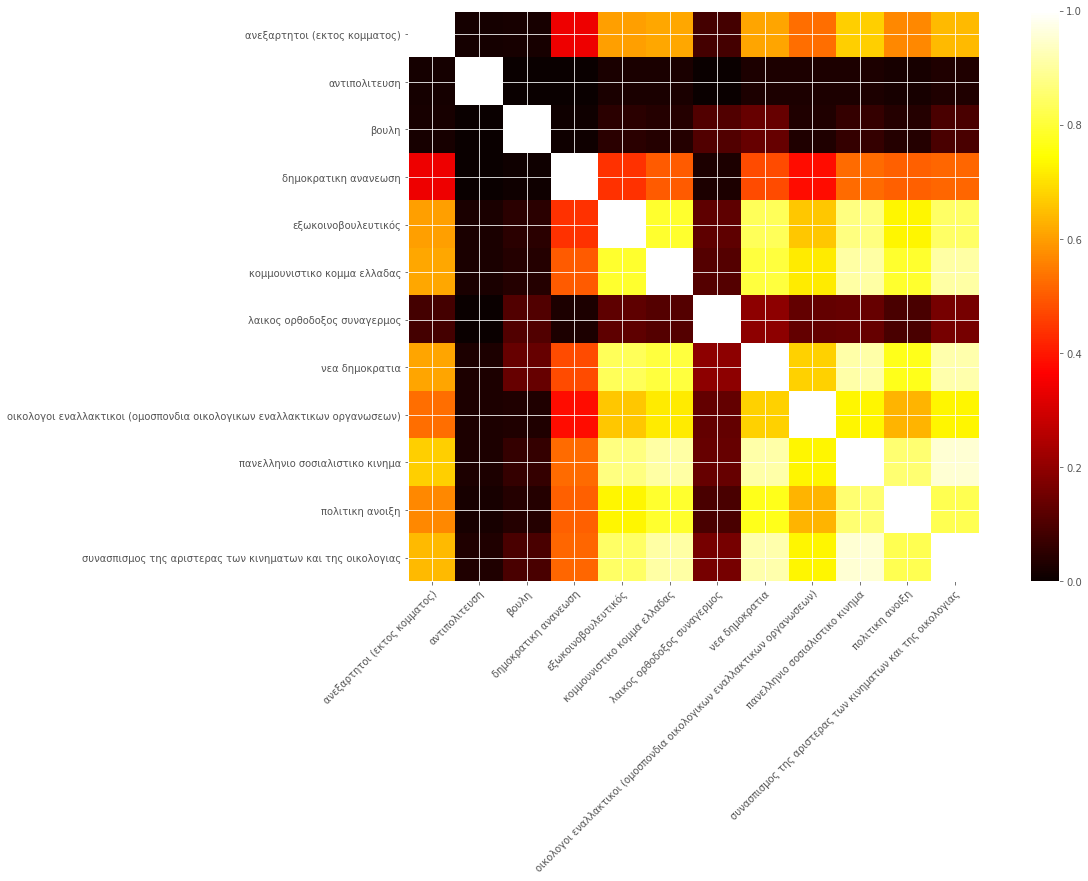

In [45]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
plt.style.use('ggplot')
plt.imshow(similarities, cmap=cmap.hot)
plt.colorbar()

# We want to show all ticks...
ax.set_xticks(np.arange(len(similarities)))
ax.set_yticks(np.arange(len(similarities)))
# ... and label them with the respective list entries
ax.set_xticklabels(grouped_data_stemmed.political_party)
ax.set_yticklabels(grouped_data_stemmed.political_party)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.savefig('../out_files/fig6.png', bbox_inches='tight')
plt.show()

# (dina) It seems the colors changed a little bit towards lower similarities with stemming

In [46]:
average6 = sum(sum(similarities)) / (12 * 12)
average6 #it decreases after the fixes

0.4546302398438579

After stemming the differences are greater.

#### Lemmatization

In [47]:
from cltk.corpus.utils.importer import CorpusImporter

corpus_importer = CorpusImporter('greek')
corpus_importer.list_corpora
corpus_importer.import_corpus('greek_models_cltk')

In [48]:
from cltk.stem.lemma import LemmaReplacer
from cltk.corpus.utils.formatter import cltk_normalize

lemmatizer = LemmaReplacer('greek')
# Δεν λειτουργεί και τρομερά αλλά δεν πειράζει
print(lemmatizer.lemmatize('Κύριε Πρόεδρε, κυρίες και κύριοι συνάδελφοι αναλαμβάνετε'))

['κύριος', 'πρόεδρος', ',', 'κυρίες', 'και', 'κύριος', 'συνάδελφοι', 'αναλαμβάνετε']


In [49]:
print(lemmatizer.lemmatize('ΚΎΡΙΕ ΠΡΌΕΔΡΕ, κυρίες και κύριοι συνάδελφοι αναλαμβάνετε')) #test and reminder

['κύριος', 'πρόεδρος', ',', 'κυρίες', 'και', 'κύριος', 'συνάδελφοι', 'αναλαμβάνετε']


In [50]:
upper_with_accents_no_stop

political_party  \
0                        ανεξαρτητοι (εκτος κομματος)   
1                                       αντιπολιτευση   
2                                               βουλη   
3                                δημοκρατικη ανανεωση   
4                                 εξωκοινοβουλευτικός   
5                         κομμουνιστικο κομμα ελλαδας   
6                         λαικος ορθοδοξος συναγερμος   
7                                      νεα δημοκρατια   
8   οικολογοι εναλλακτικοι (ομοσπονδια οικολογικων...   
9                      πανελληνιο σοσιαλιστικο κινημα   
10                                    πολιτικη ανοιξη   
11  συνασπισμος της αριστερας των κινηματων και τη...   

                                               speech  
0    ΚΎΡΙΕ ΠΡΌΕΔΡΕ ΚΥΡΊΕΣ  ΚΎΡΙΟΙ ΣΥΝΆΔΕΛΦΟΙ ΘΕΩΡΏ...  
1     ΑΚΟΎΜΕ  ΠΛΕΙΟΨΗΦΊΑ  ΠΛΕΙΟΨΗΦΊΑ  ΠΛΕΙΟΨΗΦΊΑ  ...  
2                ΈΦΥΓΕ  ΜΆΛΙΣΤΑΜΆΛΙΣΤΑ            ...  
3       ΣΗΜΑΝΤΙΚΌ ΑΞΙΌΤΙΜΕΣ ΚΥΡΊΕΣ  ΑΞΙΌΤΙΜΟΙ ΚΎΡΙ...  
4    ΚΥΡΊΕΣ  ΚΎΡΙΟΙ ΒΟΥΛΕΥΤΈΣ  ΣΥΖΉΤΗΣΗ   ΠΡΟΓΡΑΜΜ...  
5    ΚΎΡΙΕ ΠΡΌΕΔΡΕ  ΚΎΡΙΟΙ ΒΟΥΛΕΥΤΈΣ  ΠΑΡΌΝ ΝΟΜΟΣΧ...  
6     ΒΟΥΛΉ ΕΓΚΡΊΝΕΙ ΚΎΡΙΟΙ ΣΥΝΆΔΕΛΦΟΙ ΕΙΣΕΡΧΌΜΑΣΤ...  
7    ΚΥΡΊΕΣ  ΚΎΡΙΟΙ ΣΥΝΆΔΕΛΦΟΙ ΑΝΑΛΑΜΒΆΝΟΝΤΑΣ  ΠΡΟ...  
8    ΕΥΧΑΡΙΣΤΏ      ΉΡΘΕ  ΣΕΙΡΆ  ΑΝΤΙΠΡΌΣΩΠΟΙ  ΕΛΛ...  
9    ΠΑΡΑΚΑΛΕΊΤΑΙ  ΓΡΑΜΜΑΤΈΑΣ Κ ΒΟΥΛΓΑΡΆΚΗΣ  ΣΥΝΟΔ...  
10   ΚΎΡΙΕ ΠΡΌΕΔΡΕ ΑΠΛΏΣ    ΥΠΕΝΘΥΜΊΣΩ     ΣΥΜΒΕΊ ...  
11   ΚΎΡΙΕ ΠΡΌΕΔΡΕ  ΣΥΝΗΓΟΡΉΣΟΥΜΕ    ΑΊΤΗΜΑ  ΣΥΖΉΤ...

In [51]:
print(lemmatizer.lemmatize(upper_with_accents_no_stop['speech'][0]))

['κύριος', 'πρόεδρος', 'ΚΥΡΊΕΣ', 'κύριος', 'ΣΥΝΆΔΕΛΦΟΙ', 'ΘΕΩΡΏ', 'ΙΔΙΑΊΤΕΡΗ', 'τιμή', 'ΕΥΚΑΙΡΊΑ', 'ΔΌΘΗΚΕ', 'ΑΠΕΥΘΎΝΩ', 'δύο', 'λόγιον', 'βῆμα', 'κύριος', 'ΣΥΝΆΔΕΛΦΟΙ', 'γνωρίζω', 'ΜΕΙΟΝΌΤΗΤΑ', 'ΔΥΤΙΚΉΣ', 'θράκη', 'ΑΝΑΓΝΩΡΊΣΤΗΚΕ', 'ΜΕΙΟΝΌΤΗΤΑ', 'συνθήκη', 'ΛΩΖΆΝΝΗΣ', 'ΥΠΟΓΡΆΦΗΚΕ', 'ΤΟΥΡΚΊΑΣ', 'σύμμαχος', 'ΧΩΡΏΝ', 'περιλαμβάνω', 'ΕΛΛΆΣ', 'συνθήκη', 'προσδιορίζω', 'ΒΑΣΙΚΈΣ', 'ΑΡΧΈΣ', 'ΔΙΈΠΟΥΝ', 'ζωή', 'δύο', 'ΑΜΟΙΒΑΊΩΝ', 'ΜΕΙΟΝΟΤΉΤΩΝ', 'συμβάλλω', 'κρατέω', 'ΤΟΥΡΚΊΑ', 'ΕΛΛΆΔΑ', 'ΑΝΑΛΆΒΕΙ', 'ΥΠΟΧΡΈΩΣΗ', 'ΤΗΡΉΣΟΥΝ', 'ΒΑΣΙΚΈΣ', 'ΑΡΧΈΣ', 'ΕΦΑΡΜΌΣΟΥΝ', 'συμφωνία', 'ΤΟΥΡΚΟΜΟΥΣΟΥΛΜΑΝΙΚΉ', 'ΜΕΙΟΝΌΤΗΤΑ', 'ΔΥΤΙΚΉΣ', 'θράκη', 'χρόνιος', 'ΖΕΙ', 'ΜΕΙΟΝΌΤΗΤΑ', 'περάω2', 'ΔΟΚΙΜΑΣΊΕΣ', 'νομίζω', 'ΑΠΈΔΕΙΞΕ', 'ΆΝΘΡΩΠΟΙ', 'ΑΠΟΤΕΛΟΎΝ', 'φιλήσυχος', 'ΝΟΜΟΤΑΓΕΊΣ', 'ΠΟΛΊΤΕΣ', 'ΥΠΆΚΟΥΟΙ', 'ΕΡΓΑΤΙΚΟΊ', 'δραστήριος', 'ΆΝΘΡΩΠΟΙ', 'ΑΓΑΠΟΎΝ', 'ΙΔΙΑΊΤΕΡΑ', 'πατρίς', 'ΕΛΛΆΔΑ', 'ΠΑΡΑΣΤΕΊ', 'ΑΝΆΓΚΗ', 'σκέπτομαι', 'ΘΥΣΙΆΣΟΥΝ', 'ζωή', 'πολίτης', 'χάρις', 'πατρίς', 'νομίζω', 'ΚΑΛΎΤΕΡΟ', 'παράδειγμα', 'θέμα', 'ΔΌΘΗΚΕ', 'δ

Lemmatization doesn't work properly with uppercase words without accents. For this reason we change the preprocess.

In [52]:
grouped_data_lemmatized = upper_with_accents_no_stop.copy() #(dina) copy grouped_data_stopwords_removed instead of data_preprocess
#because we need the accents
grouped_data_lemmatized['speech'].at[1]

'  ΑΚΟΎΜΕ  ΠΛΕΙΟΨΗΦΊΑ  ΠΛΕΙΟΨΗΦΊΑ  ΠΛΕΙΟΨΗΦΊΑ  ΠΛΕΙΟΨΗΦΊΑ  ΑΝΤΊΓΡΑΦΟ ΚΎΡΙΟΙ ΣΥΝΆΔΕΛΦΟΙ  ΥΠΆΡΧΕΙ  ΕΓΓΕΓΡΑΜΜΈΝΟΣ  ΜΙΛΉΣΕΙ   ΆΡΘΡΟΥ   ΚΎΡΙΟΣ ΥΠΟΥΡΓΌΣ   ΛΌΓΟΕΊΝΑΙ  ΤΡΟΠΟΛΟΓΊΑ  ΥΠΟΥΡΓΕΊΟΥ ΤΟΥΡΙΣΜΟΎ    ΆΡΣΗ  ΠΡΟΣΤΑΣΊΑΣ  ΕΠΑΓΓΕΛΜΑΤΙΚΉΣ ΣΤΈΓΗΣ  ΜΙΣΘΏΣΕΙΣ ΑΚΙΝΉΤΩΝ  ΕΟΤ  ΛΌΓΟΣ  ΣΑΦΉΣ ΥΠΆΡΧΕΙ ΠΡΌΘΕΣΗ  ΒΕΛΤΙΏΣΕΩΣ    ΤΡΌΠΟ ΚΑΛΥΤΈΡΑΣ ΑΞΙΟΠΟΙΉΣΕΩΣ   ΑΚΙΝΉΤΩΝ   ΔΥΣΤΥΧΏΣ ΒΡΊΣΚΟΝΤΑΙ   ΚΑΚΉ ΚΑΤΆΣΤΑΣΗ   ΥΠΆΡΧΟΥΝ     ΝΈΜΟΝΤΑΙ   ΣΤΙΓΜΉ   ΑΞΙΟΠΟΙΟΎΝ ΕΠΑΡΚΏΣ  ΔΥΝΑΤΌΤΗΤΕΣ     ΕΟΤ    ΔΥΝΑΤΌΤΗΤΑ  ΔΙΑΚΟΠΟΎΝ   ΣΥΜΒΆΣΕΙΣ     ΑΞΙΟΠΟΙΗΘΟΎΝ ΚΑΛΎΤΕΡΑ   ΑΚΊΝΗΤΑ  ΠΛΑΊΣΙΟ  ΓΕΝΙΚΉΣ ΠΟΛΙΤΙΚΉΣ    ΑΝΑΒΑΘΜΊΣΕΩΣ  ΞΕΝΟΔΟΧΕΊΩΝ    ΤΟΥΡΙΣΤΙΚΏΝ ΕΓΚΑΤΑΣΤΆΣΕΩΝ   ΑΝΉΚΟΥΝ  ΔΙΑΝΕΜΗΘΕΊ   ΤΡΟΠΟΛΟΓΊΑ     ΓΕΝΙΚΌ ΑΡΙΘΜΌ   ΕΙΔΙΚΌ  ΑΊΣΧΟΣ ΑΊΣΧΟΣ'

In [53]:
def lemmatizing_tokenizer(str_input):
    speeches = cltk_normalize(str_input)
    lemmas = lemmatizer.lemmatize(speeches)
    print(lemmas[:10])
    return lemmas

In [54]:
%%time
#here there is no warning about the tokenizer and the stop words
vec = TfidfVectorizer(min_df=0.1, max_df=0.9, tokenizer=lemmatizing_tokenizer) #(dina) removed parameter stop_words=set(stopwords)
X = vec.fit_transform(grouped_data_lemmatized['speech'])
similarities = cosine_similarity(X)

['κύριος', 'πρόεδρος', 'κυρίες', 'κύριος', 'συνάδελφοι', 'θεωρώ', 'ιδιαίτερη', 'τιμή', 'ευκαιρία', 'δόθηκε']
['ακούμε', 'πλειοψηφία', 'πλειοψηφία', 'πλειοψηφία', 'πλειοψηφία', 'αντίγραφο', 'κύριος', 'συνάδελφοι', 'υπάρχει', 'εγγεγραμμένος']
['έφυγε', 'μάλισταμάλιστα', 'γιαννης', 'ν', 'γιαννης', 'ν', 'μάλιστασελιδα', 'τέος', 'πρωθυπουργό', 'διαβεβαιώσω']
['σημαντικό', 'αξιότιμες', 'κυρίες', 'αξιότιμοι', 'κύριος', 'συνάδελφοι', 'σ', 'περίοδο', 'βουλευτικός', 'επήλθε']
['κυρίες', 'κύριος', 'βουλευτές', 'συζήτηση', 'προγραμματικές', 'δηλόω', 'βουλή', 'χῶρος', 'ζωής', 'επαναλαμβάνεται']
['κύριος', 'πρόεδρος', 'κύριος', 'βουλευτές', 'πάρειμι1', 'νομοσχέδιο', 'αναφέρεται', 'οδικές', 'μεταφορές', 'βασικά']
['βουλή', 'εγκρίνει', 'κύριος', 'συνάδελφοι', 'εισερχόμαστε', 'ημερήσια', 'διάταξητης', 'νομοθετικης', 'εργασιας', 'συζητηθεί']
['κυρίες', 'κύριος', 'συνάδελφοι', 'αναλαμβάνοντας', 'προεδρία', 'σῶμα', 'αρχήν', 'ευχαριστήσω', 'ψήφισαν', 'ευχαριστήσω']
['ευχαριστώ', 'ήρθε', 'σειρά', 'αντιπρό

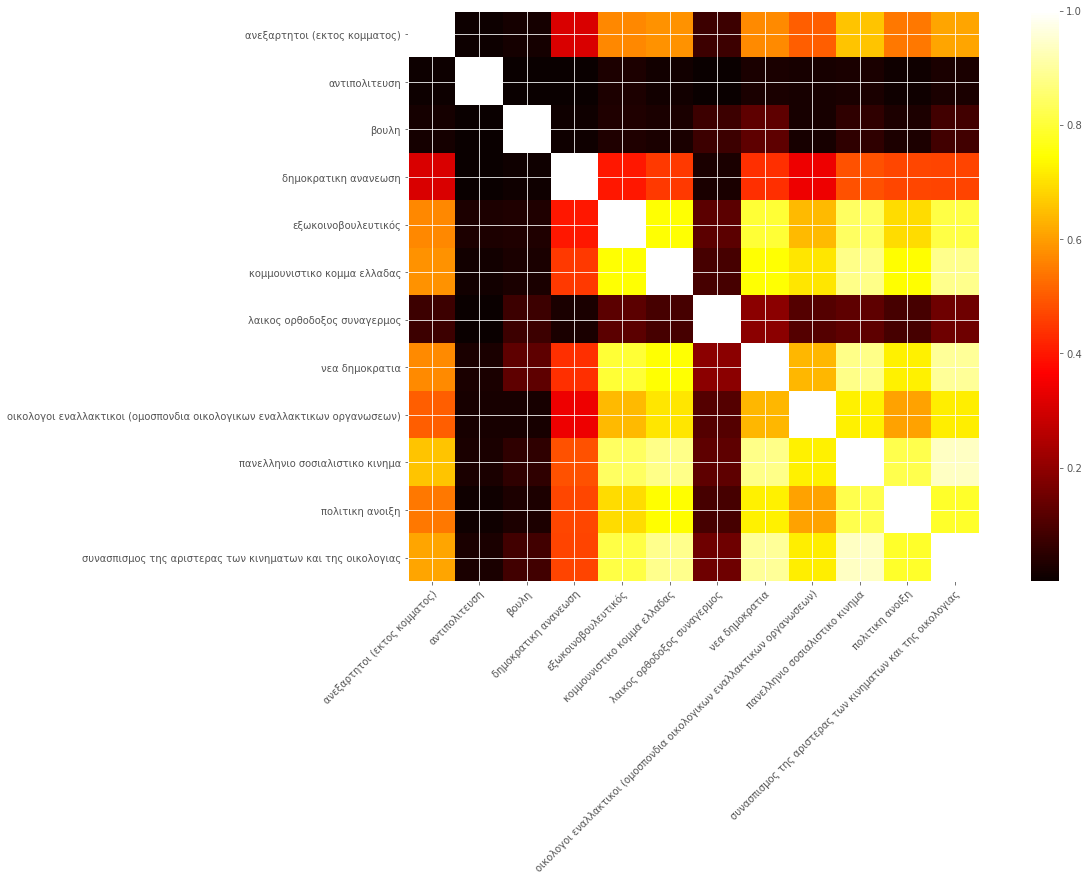

In [55]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
plt.style.use('ggplot')
plt.imshow(similarities, cmap=cmap.hot)
plt.colorbar()

# We want to show all ticks...
ax.set_xticks(np.arange(len(similarities)))
ax.set_yticks(np.arange(len(similarities)))
# ... and label them with the respective list entries
ax.set_xticklabels(grouped_data_lemmatized.political_party)
ax.set_yticklabels(grouped_data_lemmatized.political_party)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.savefig('../out_files/fig7.png', bbox_inches='tight')
plt.show()

In [56]:
average7 = sum(sum(similarities)) / (12 * 12)
average7 #it decreases too

0.4350797867429525

The differences amplify. This result is very similar to the result involving only digit removal.

#### Spacy Lemmatizing

The spacy lemmatizer is really slow. For this reason we read again the data but we select to analyze less rows. Then we remove digits, stopwords, we lower the sentences and we find the similarities.

In [57]:
%%time
import string
from string import digits

data = pd.read_csv('../out_files/tell_all_corrected.csv', nrows=10000)

grouped_data = data.groupby(['political_party'])['speech'].apply(''.join).reset_index()

remove_digits = str.maketrans('', '', digits)
grouped_data['speech'] = grouped_data['speech'].apply(lambda x: x.translate(remove_digits))

grouped_data['speech'] = grouped_data['speech'].str.upper()
grouped_data['speech'] = grouped_data['speech'].str.translate(str.maketrans('', '', string.punctuation))

remove = ('|'.join(stopwords)).upper()

grouped_data = grouped_data.copy()
grouped_data['speech'] = grouped_data['speech'].replace(r'\b('+remove+r')\b', '', regex=True)
grouped_data['speech'] = grouped_data['speech'].str.lower()
grouped_data.speech = grouped_data.speech.replace('\s+', ' ', regex=True)
grouped_data

CPU times: user 30.8 s, sys: 108 ms, total: 30.9 s
Wall time: 30.9 s


political_party  \
0                                              βουλη   
1                               δημοκρατικη ανανεωση   
2                                εξωκοινοβουλευτικός   
3                        λαικος ορθοδοξος συναγερμος   
4                                     νεα δημοκρατια   
5  οικολογοι εναλλακτικοι (ομοσπονδια οικολογικων...   
6                     πανελληνιο σοσιαλιστικο κινημα   
7  συνασπισμος της αριστερας των κινηματων και τη...   

                                              speech  
0   έφυγε μάλισταμάλιστα γιαννης ν γιαννης ν μάλι...  
1   σημαντικό αξιότιμες κυρίες αξιότιμοι κύριοι σ...  
2   κυρίες κύριοι βουλευτές συζήτηση προγραμματικ...  
3   βουλή εγκρίνει κύριοι συνάδελφοι εισερχόμαστε...  
4   κυρίες κύριοι συνάδελφοι αναλαμβάνοντας προεδ...  
5   ευχαριστώ ήρθε σειρά αντιπρόσωποι ελληνίδων ε...  
6   παρακαλείται γραμματέας κ βουλγαράκης συνοδεύ...  
7   κύριε πρόεδρε συνηγορήσουμε αίτημα συζήτηση α...

In [58]:
%%time
import spacy
import el_core_news_lg # lg was too slow

nlp = el_core_news_lg.load()
doc = nlp("καλής συνείδησης") # it works only with accents (some cases) and lowercase letters
#doc = nlp(" ΚΑΛΉΣ ΣΥΝΕΊΔΗΣΗΣ  ") # more than one continuous spaces should be removed, too

for token in doc:
    print(token, token.lemma, token.lemma_)

καλής 16724648468338731141 καλός
συνείδησης 12885179808255376432 συνείδηση
CPU times: user 3.24 s, sys: 1.4 s, total: 4.64 s
Wall time: 16.4 s


In [59]:
#all_lemmas = []
nlp.max_length = 10000000
def spacy_lemmatizing_tokenizer(str_input):
    speech = nlp(str_input)
    lemmas = []
    for token in speech:
        lemmas.append(token.lemma_) # maybe it should be lemma_ instead of lemma
    print(lemmas[:10])
    return lemmas

In [60]:
%%time
vec = TfidfVectorizer(min_df=0.1, max_df=0.9, tokenizer=spacy_lemmatizing_tokenizer)
X = vec.fit_transform(grouped_data.speech)
similarities = cosine_similarity(X)

[' ', 'έφυγε', 'μάλισταμάλιστα', 'γιαννης', 'ν', 'γιαννης', 'ν', 'μάλιστασελιδα', 'τέως', 'πρωθυπουργό']
[' ', 'σημαντικό', 'αξιότιμες', 'κυρία', 'αξιότιμος', 'κύριοι', 'συνάδελφοι', 'σ', 'περίοδο', 'βουλευτικός']
[' ', 'κυρία', 'κύριος', 'βουλευτής', 'συζήτηση', 'προγραμματικός', 'δηλώσει', 'βουλή', 'χώρου', 'ζωή']
[' ', 'βουλή', 'εγκρίνω', 'κύριοι', 'συνάδελφοι', 'εισερχόμαστε', 'ημερήσιος', 'διάταξητης', 'νομοθετικης', 'εργασια']
[' ', 'κυρία', 'κύριος', 'συνάδελφοι', 'αναλαμβάνω', 'προεδρία', 'σώμα', 'αρχήν', 'ευχαριστήσω', 'ψήφομαι']
[' ', 'ευχαριστώ', 'ήρθε', 'σειρά', 'αντιπρόσωποι', 'ελληνίδων', 'ελλήνων', 'πολιτή', 'κατάκτηση', 'οικολογικό']
[' ', 'παρακαλείται', 'γραμματέας', 'κ', 'βουλγαράκης', 'συνοδεύσω', 'μακαριότατος', 'αρχιεπίσκοπο', 'αθηνών', 'πάσης']
[' ', 'κύριε', 'πρόεδρε', 'συνηγορήσουμε', 'αίτημα', 'συζήτηση', 'αρχίσω', 'παρασκευή', 'πρωί', 'ανάγκη']
CPU times: user 4min 4s, sys: 27.6 s, total: 4min 32s
Wall time: 15min 54s


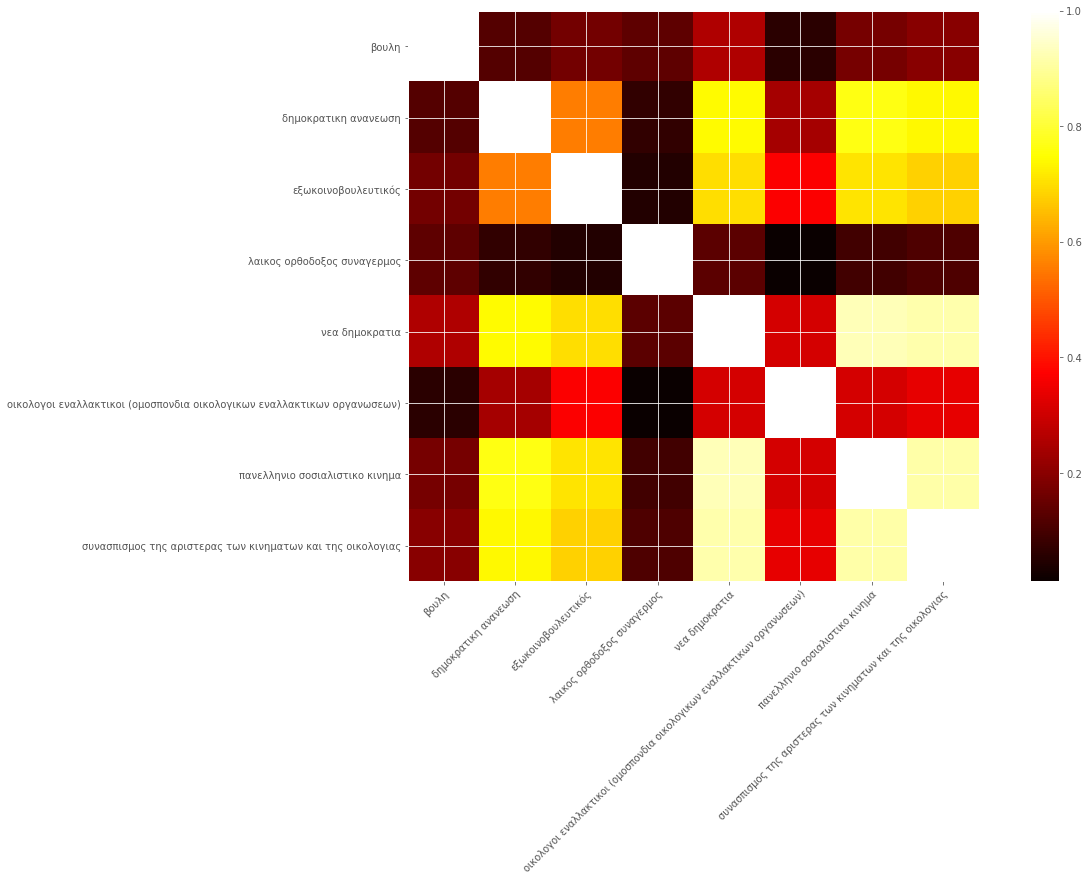

In [61]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
plt.style.use('ggplot')
plt.imshow(similarities, cmap=cmap.hot)
plt.colorbar()

# We want to show all ticks...
ax.set_xticks(np.arange(len(similarities)))
ax.set_yticks(np.arange(len(similarities)))
# ... and label them with the respective list entries
ax.set_xticklabels(grouped_data.political_party)
ax.set_yticklabels(grouped_data.political_party)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.savefig('../out_files/fig7.png', bbox_inches='tight')
plt.show()

In [62]:
average7 = sum(sum(similarities)) / (12 * 12)
average7 #it decreases after the fixes

0.2058809517737294

In [63]:
import el_core_news_sm # lg was too slow

nlp = el_core_news_sm.load()
nlp.max_length = 10000000

In [64]:
%%time
vec = TfidfVectorizer(min_df=0.1, max_df=0.9, tokenizer=spacy_lemmatizing_tokenizer)
X = vec.fit_transform(grouped_data.speech)
similarities = cosine_similarity(X)

[' ', 'έφυγε', 'μάλισταμάλιστα', 'γιαννη', 'ν', 'γιαννης', 'ν', 'μάλιστασελιδα', 'τέω', 'πρωθυπουργό']
[' ', 'σημαντικό', 'αξιότιμες', 'κυρία', 'αξιότιμος', 'κύριοι', 'συνάδελφοι', 'σ', 'περίοδο', 'βουλευτικός']
[' ', 'κυρία', 'κύριοι', 'βουλευτής', 'συζήτηση', 'προγραμματικός', 'δηλώσει', 'βουλή', 'χώρου', 'ζωή']
[' ', 'βουλή', 'εγκρίνω', 'κύριος', 'συνάδελφοι', 'εισερχόμαστε', 'ημερήσιας', 'διάταξητης', 'νομοθετικης', 'εργασια']
[' ', 'κυρία', 'κύριοι', 'συνάδελφοι', 'αναλαμβάνω', 'προεδρία', 'σώμα', 'αρχήν', 'ευχαριστήσω', 'ψήφομαι']
[' ', 'ευχαριστώ', 'ήρθε', 'σειρά', 'αντιπρόσωποι', 'ελληνίδων', 'ελλήνων', 'πολιτή', 'κατάκτηση', 'οικολογικό']
[' ', 'παρακαλείται', 'γραμματέας', 'κ', 'βουλγαράκης', 'συνοδεύσω', 'μακαριότατος', 'αρχιεπίσκοπο', 'αθηνά', 'πάση']
[' ', 'κύριε', 'πρόεδρε', 'συνηγορήσω', 'αίτημα', 'συζήτηση', 'αρχίσω', 'παρασκευή', 'πρωί', 'ανάγκη']
CPU times: user 4min 54s, sys: 20.8 s, total: 5min 15s
Wall time: 6min 57s


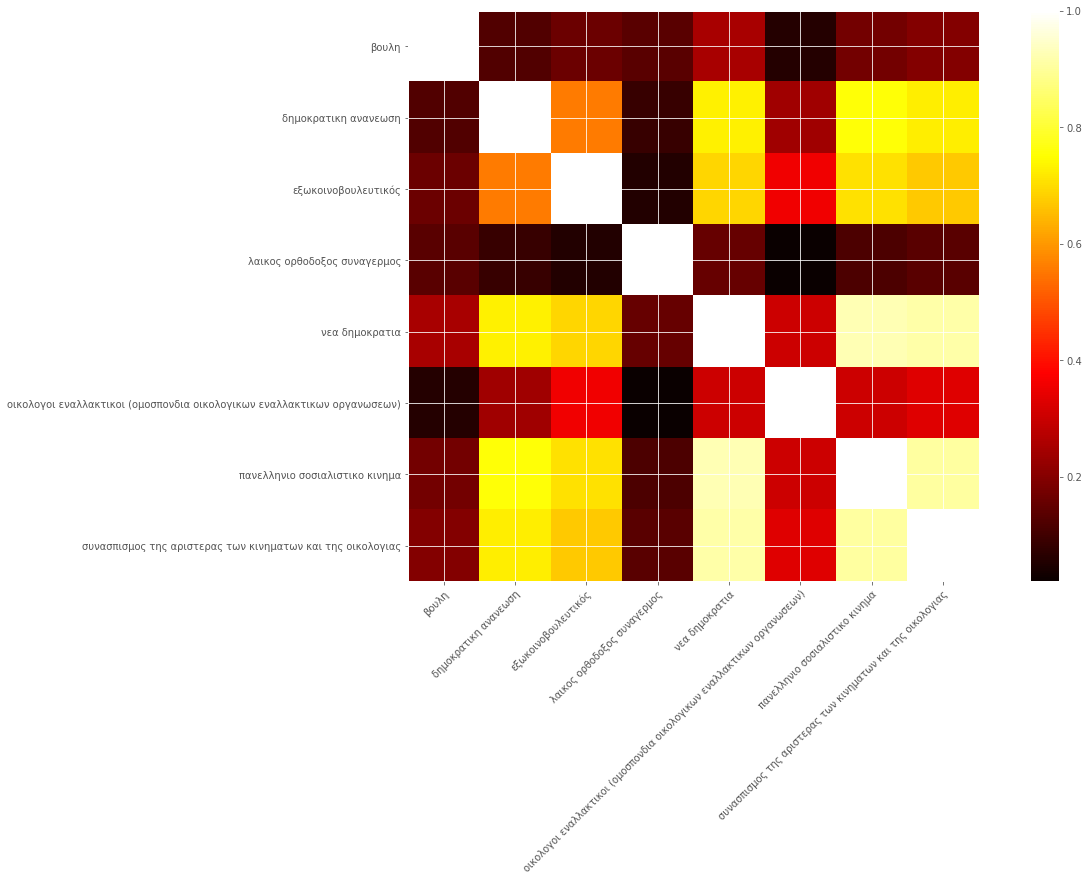

In [65]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
plt.style.use('ggplot')
plt.imshow(similarities, cmap=cmap.hot)
plt.colorbar()

# We want to show all ticks...
ax.set_xticks(np.arange(len(similarities)))
ax.set_yticks(np.arange(len(similarities)))
# ... and label them with the respective list entries
ax.set_xticklabels(grouped_data.political_party)
ax.set_yticklabels(grouped_data.political_party)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.savefig('../out_files/fig7.png', bbox_inches='tight')
plt.show()

In [66]:
average7 = sum(sum(similarities)) / (12 * 12)
average7 #it decreases after the fixes

0.20572895827506568

The diferences are very low using this lemmatizer. However, there is almost no difference between el_core_news_sm and el_core_news_lg.